In [1]:
import pandas as pd 


In [2]:
train_df=pd.read_csv(r"C:\Users\adeel\Desktop\GitHub\Data_Sets\Emotions dataset for NLP\train.txt",delimiter=";"  , names=['names', 'label']) 
val_df=pd.read_csv(r"C:\Users\adeel\Desktop\GitHub\Data_Sets\Emotions dataset for NLP\val.txt",delimiter=";"  , names=['names', 'label']) 

In [3]:
df=pd.concat([train_df,val_df])
df.reset_index(inplace=True , drop=True)

In [4]:
df.head(5)

,names,label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [5]:
import seaborn as sns 

<Axes: xlabel='label', ylabel='count'>

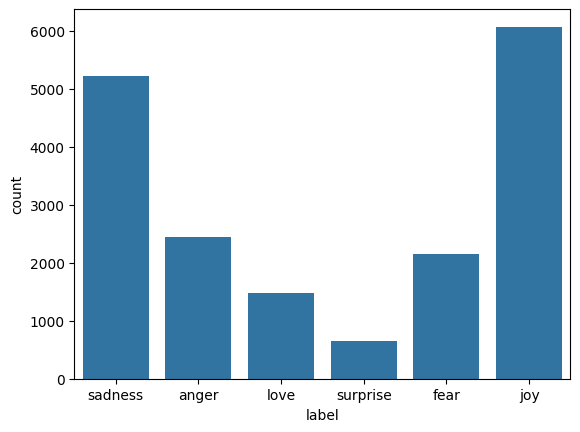

In [6]:
sns.countplot(x=df['label'])

In [7]:

def custom_encoder(df):
    df.replace(to_replace ="surprise", value =1, inplace=True)
    df.replace(to_replace ="love", value =1, inplace=True)
    df.replace(to_replace ="joy", value =1, inplace=True)
    df.replace(to_replace ="fear", value =0, inplace=True)
    df.replace(to_replace ="anger", value =0, inplace=True)
    df.replace(to_replace ="sadness", value =0, inplace=True)

In [8]:
custom_encoder(df['label'])

<Axes: xlabel='label', ylabel='count'>

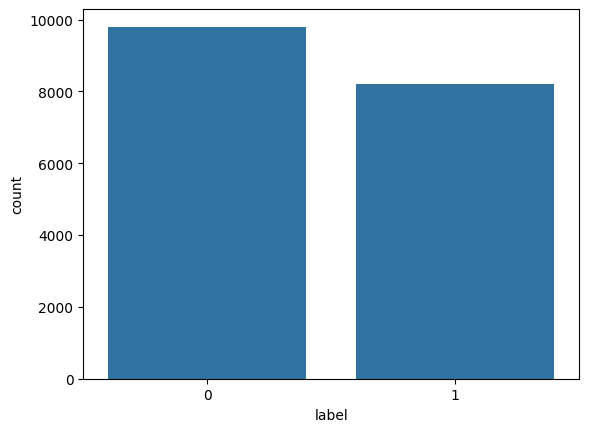

In [9]:
sns.countplot(x=df['label'])

In [10]:
#1.First, we will iterate through each record, and by using regular expression, we will get rid of any characters apart from alphabets.
#2.Then, we will convert the string to lowercase as the word “Good” is different from the word “good”.
#3. Then we will check for stopwords in the data and get rid of them.
#4. Then, we will perform lemmatization on each word, i.e. change the different forms of a word into a single item called a lemma.
#5. And, then we will return a corpus of processed data.

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re


from matplotlib import style,rcParams

rcParams['figure.figsize'] = 10,5
import warnings
warnings.filterwarnings('ignore')

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,classification_report

import nltk
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\adeel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\adeel\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [12]:
#object of WordNetLemmatizer
lm = WordNetLemmatizer()
def text_transformation(df_col):
    corpus = []
    for item in df_col:
        new_item = re.sub('[^a-zA-Z]',' ',str(item))
        new_item = new_item.lower()
        new_item = new_item.split()
        new_item = [lm.lemmatize(word) for word in new_item if word not in set(stopwords.words('english'))]
        corpus.append(' '.join(str(x) for x in new_item))
    return corpus
corpus = text_transformation(df['names'])

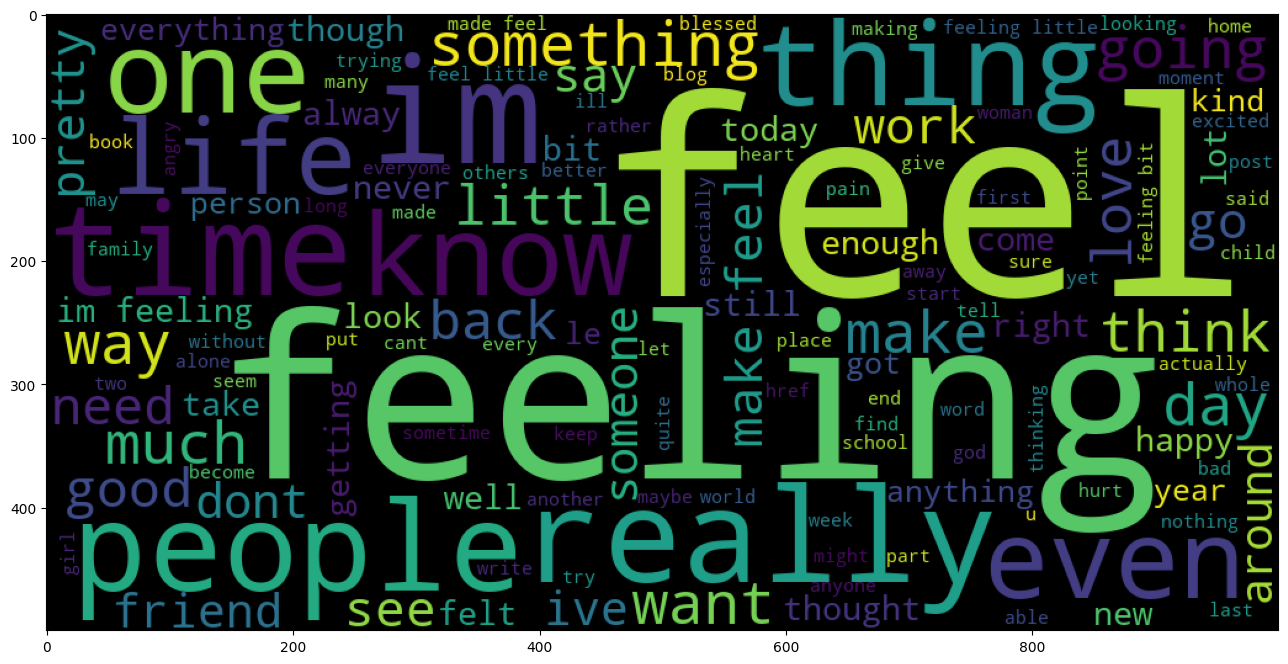

In [13]:
rcParams['figure.figsize'] = 20,8
wordcloud = ""
for row in corpus:
    for word in row:
        wordcloud+=" ".join(word)


word_cloud = WordCloud(font_path=None, width=1000, height=500, max_words=200, min_font_size=12, background_color="black").generate(wordcloud)
plt.imshow(word_cloud)

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

In [15]:
cv = CountVectorizer(ngram_range=(1,2))
train_data = cv.fit_transform(corpus)

In [17]:
X = train_data
y = df.label       

In [18]:
parameters = {
    'max_features': ['sqrt', 'log2'],
    'n_estimators': [500, 1000],
    'max_depth': [10, None],
    'min_samples_split': [5],
    'min_samples_leaf': [1],
    'bootstrap': [True]
}


In [ ]:
#grid_search = GridSearchCV(RandomForestClassifier(),parameters, cv=5, return_train_score=True , n_jobs=1)
#grid_search.fit(X,y)
#grid_search.best_params_

In [ ]:
grid_search = GridSearchCV(RandomForestClassifier(),parameters,cv=5,return_train_score=True,n_jobs=-1)
grid_search.fit(X,y)
grid_search.best_params_

In [ ]:
#for i in range(6):
#    print('Parameters: ',grid_search.cv_results_['params'][i])
#    #print('Parameters',grid_search.cv_results_['Params'][i])
 #   print('Mean Test Score',grid_search.cv_results_['mean_test_score'][i])      
  #  print('rank',grid_search.cv_results_['rank_test_score'][i])

In [ ]:
for i in range(6):
    print('Parameters: ',grid_search.cv_results_['params'][i])
    print('Mean Test Score: ',grid_search.cv_results_['mean_test_score'][i])
    print('Rank: ',grid_search.cv_results_['rank_test_score'][i])

In [ ]:
{'bootstrap': True,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 500}

In [ ]:
rfc = RandomForestClassifier(max_features=grid_search.best_params_['max_features'],
                                      max_depth=grid_search.best_params_['max_depth'],
                                      n_estimators=grid_search.best_params_['n_estimators'],
                                      min_samples_split=grid_search.best_params_['min_samples_split'],
                                      min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
                                      bootstrap=grid_search.best_params_['bootstrap'])

In [ ]:
rfc.fit(X,y)

In [ ]:
test_df=pd.read_csv(r"C:\Users\adeel\Desktop\GitHub\Data_Sets\Emotions dataset for NLP\test.txt",delimiter=";",names=['text','labels'])

In [ ]:
X_test,y_test = test_df.text,test_df.labels
#encode the labels into two classes , 0 and 1
test_df = custom_encoder(y_test)
#pre-processing of text
test_corpus = text_transformation(X_test)
#convert text data into vectors
testdata = cv.transform(test_corpus)
#predict the target
predictions = rfc.predict(testdata)

In [ ]:
from scikitplot.metrics import plot_confusion_matrix

In [ ]:
rcParams['figure.figsize'] = 10,5
plot_confusion_matrix(y_test,predictions)
acc_score = accuracy_score(y_test,predictions)
pre_score = precision_score(y_test,predictions)
rec_score = recall_score(y_test,predictions)
print('Accuracy_score: ',acc_score)
print('Precision_score: ',pre_score)
print('Recall_score: ',rec_score)
print('-------------------------------------------------------------------')
cr = classification_report(y_test,predictions)
print(cr)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues,
                          figsize=(10, 5)):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots(figsize=figsize)
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

# Set figure size
plt.rcParams['figure.figsize'] = 10, 5

# Define the classes
classes = ['0', '1']  # Replace with your actual class names

# Call the plot_confusion_matrix function with the classes argument
plot_confusion_matrix(y_test, predictions, classes)

# Calculate and print scores
acc_score = accuracy_score(y_test, predictions)
pre_score = precision_score(y_test, predictions)
rec_score = recall_score(y_test, predictions)
print('Accuracy_score: ', acc_score)
print('Precision_score: ', pre_score)
print('Recall_score: ', rec_score)
print('-------------------------------------------------------------------')

# Print classification report
cr = classification_report(y_test, predictions)
print(cr)


In [ ]:
predictions_probability = rfc.predict_proba(testdata)

In [ ]:
fpr,tpr,thresholds = roc_curve(y_test,predictions_probability[:,1])
plt.plot(fpr,tpr)
plt.plot([0,1])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()



In [ ]:
def expression_check(prediction_input):
    if prediction_input == 0:
        print("Input statement has Negative Sentiment.")
    elif prediction_input == 1:
        print("Input statement has Positive Sentiment.")
    else:
        print("Invalid Statement.")

In [ ]:
def sentiment_predictor(input):
    input = text_transformation(input)
    transformed_input = cv.transform(input)
    prediction = rfc.predict(transformed_input)
    expression_check(prediction)

In [ ]:
input1 = ["the food was really good"]
input2 = ["I bought a new phone and it's so good."]
input3 = ["i bought a new puppy! im so happy"]
sentiment_predictor(input1)
sentiment_predictor(input2)
sentiment_predictor(input3)